In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import cv2
import random
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [2]:
x = np.load("saved_x.npy")
y = np.load("saved_y.npy")
cat = np.load("saved_cat.npy")

In [3]:
model = Sequential([
    Conv2D(64, 3, padding='same', activation='relu', input_shape=(150, 150 ,3)),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(cat), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
model.fit(x, y, batch_size=32, epochs=15, initial_epoch=0, shuffle=True, validation_split=0.15)

Train on 5807 samples, validate on 1025 samples
Epoch 1/15
5807/5807 [==============================] - 27s 5ms/sample - loss: 1.5636 - accuracy: 0.4350 - val_loss: 1.1969 - val_accuracy: 0.5600
Epoch 2/15
5807/5807 [==============================] - 23s 4ms/sample - loss: 0.9633 - accuracy: 0.6516 - val_loss: 0.9587 - val_accuracy: 0.6605
Epoch 3/15
5807/5807 [==============================] - 23s 4ms/sample - loss: 0.6068 - accuracy: 0.7815 - val_loss: 0.9864 - val_accuracy: 0.6761
Epoch 4/15
5807/5807 [==============================] - 23s 4ms/sample - loss: 0.3141 - accuracy: 0.8908 - val_loss: 1.2315 - val_accuracy: 0.6839
Epoch 5/15
5807/5807 [==============================] - 23s 4ms/sample - loss: 0.1783 - accuracy: 0.9420 - val_loss: 1.2487 - val_accuracy: 0.7015
Epoch 6/15
5807/5807 [==============================] - 23s 4ms/sample - loss: 0.0836 - accuracy: 0.9742 - val_loss: 1.6655 - val_accuracy: 0.6878
Epoch 7/15
5807/5807 [==============================] - 23s 4ms/sample

In [5]:
model.fit(x, y, batch_size=32, epochs=30, initial_epoch=15, shuffle=True, validation_split=0.15)

Train on 5807 samples, validate on 1025 samples
Epoch 16/30
5807/5807 [==============================] - 23s 4ms/sample - loss: 0.0061 - accuracy: 0.9983 - val_loss: 2.0152 - val_accuracy: 0.7337
Epoch 17/30
5807/5807 [==============================] - 23s 4ms/sample - loss: 0.0356 - accuracy: 0.9902 - val_loss: 2.0392 - val_accuracy: 0.7073
Epoch 18/30
5807/5807 [==============================] - 23s 4ms/sample - loss: 0.0937 - accuracy: 0.9761 - val_loss: 1.9058 - val_accuracy: 0.6976
Epoch 19/30
5807/5807 [==============================] - 23s 4ms/sample - loss: 0.0281 - accuracy: 0.9912 - val_loss: 2.0021 - val_accuracy: 0.7122
Epoch 20/30
5807/5807 [==============================] - 23s 4ms/sample - loss: 0.0031 - accuracy: 0.9993 - val_loss: 2.1029 - val_accuracy: 0.7288
Epoch 21/30
5807/5807 [==============================] - 23s 4ms/sample - loss: 0.0565 - accuracy: 0.9836 - val_loss: 2.2602 - val_accuracy: 0.7093
Epoch 22/30
5807/5807 [==============================] - 23s 4ms

In [12]:
hist = model.fit(x, y, batch_size=32, epochs=31, initial_epoch=30, shuffle=True, validation_split=0.15)

Train on 5807 samples, validate on 1025 samples
Epoch 31/31
5807/5807 [==============================] - 23s 4ms/sample - loss: 0.0340 - accuracy: 0.9898 - val_loss: 2.3043 - val_accuracy: 0.6946


ValueError: x and y must have same first dimension, but have shapes (31,) and (1,)

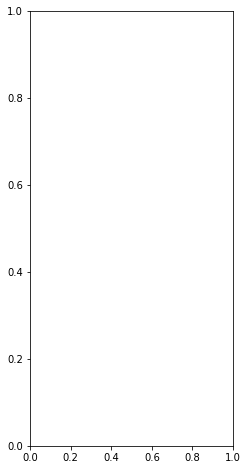

In [19]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(31)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()